In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Circle
import random as rd

In [2]:
def generar_puntos_circunferencia_escotoma(radio, num_puntos, centro=(0, 0)):
    angulos = np.linspace(0,  2*np.pi, num_puntos, endpoint=False)  # Ángulos distribuidos uniformemente
    x = centro[0] + radio * np.cos(angulos)  # Coordenadas X
    y = centro[1] + radio * np.sin(angulos)  # Coordenadas Y
    return x, y

def generar_puntos_circunferencia(radio,lim1, lim2, num_puntos, centro=(0, 0)):
    angulos = np.linspace(lim1,lim2, num_puntos, endpoint=False)  # Ángulos distribuidos uniformemente
    x = centro[0] + radio * np.cos(angulos)  # Coordenadas X
    y = centro[1] + radio * np.sin(angulos)  # Coordenadas Y
    return x, y

# Ambas funciones me devuelven los datos interpretados en grados

# Funcion para pasar de grados a mm en pantalla
def grados_a_mm(valor):
    return valor*5.25

def mm_a_grados(valor):
    return valor/5.25

In [3]:
# Genero el perímetro del escotoma fisiológico
px,py = generar_puntos_circunferencia_escotoma(3,100,centro=(15,0))

In [4]:
# Determino los siguientes parámetros: radios y cantidad de estímulos para cada circunferencia
Estimulos = [] 
radios = np.arange(7,22,1.5)
lim1,lim2 = -np.pi/4, np.pi/4
num_puntos = 3
for i in range(len(radios)):
    x,y = generar_puntos_circunferencia(radios[i],lim1,lim2,num_puntos,centro=(0,0))
    num_puntos = num_puntos+1
    for i in range(1,len(x)):
        Estimulos.append([x[i],y[i]])

C:\Users\paula\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


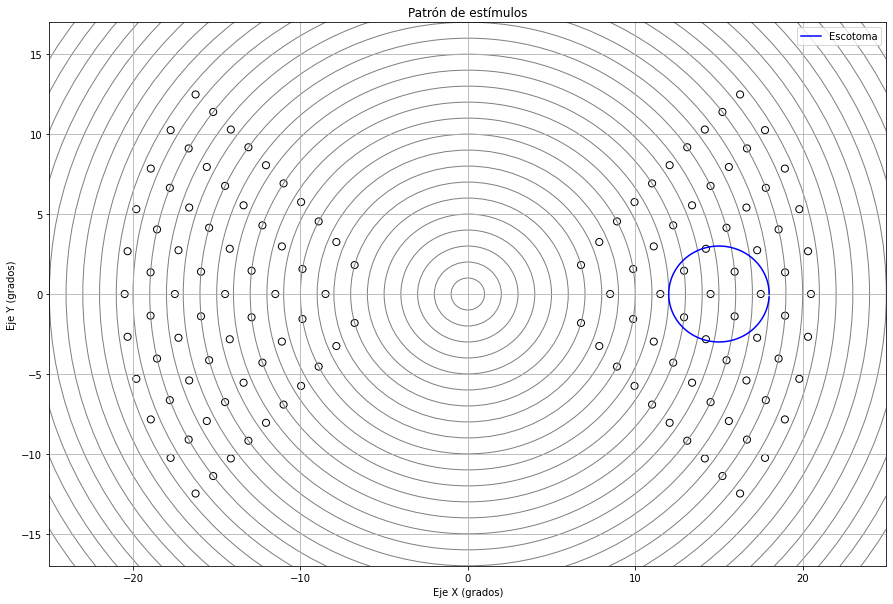

130


In [5]:
plt.figure(figsize=(15,10))
plt.scatter(np.array([coord[0] for coord in Estimulos]), np.array([coord[1] for coord in Estimulos]), s=50,edgecolors='black',facecolors='none')# Puntos grandes sin relleno
plt.scatter((-1)*np.array([coord[0] for coord in Estimulos]),(-1)*np.array([coord[1] for coord in Estimulos]), s=50,edgecolors='black',facecolors='none')# Puntos grandes sin relleno
plt.plot(px, py,color='blue',label='Escotoma')# Puntos grandes sin relleno
# Configurar etiquetas y límites
plt.xlabel('Eje X (grados)')
plt.ylabel('Eje Y (grados)')
plt.xlim(-25,25)
plt.ylim(-17,17)
plt.grid(True,axis='both')
plt.legend()
# Añadir circunferencias de cuadrícula

for i in range(0, 30):
    circulo = Circle((0, 0), i,linestyle='-',facecolor='none',edgecolor='grey')        
    plt.gca().add_artist(circulo)
plt.title('Patrón de estímulos')

# Añadir cuadrícula con más líneas verticales y horizontales
plt.show()
print(2*len([coord[0] for coord in Estimulos]))

In [152]:
# Simulo una prueba con resultados 1 y 0
Resultado = []
estimulo_no_detectado = []
for i in range(len([coord[0] for coord in Estimulos])):
    x,y = [coord[0] for coord in Estimulos][i],[coord[1] for coord in Estimulos][i]
    for j in range(2):
        resultado = rd.randint(0,10)
        if resultado == 0:
            Resultado.append([x,y,resultado])
            estimulo_no_detectado.append([x,y])
        else:
             Resultado.append([x,y])
        x , y = -x , -y
len(Resultado)

130

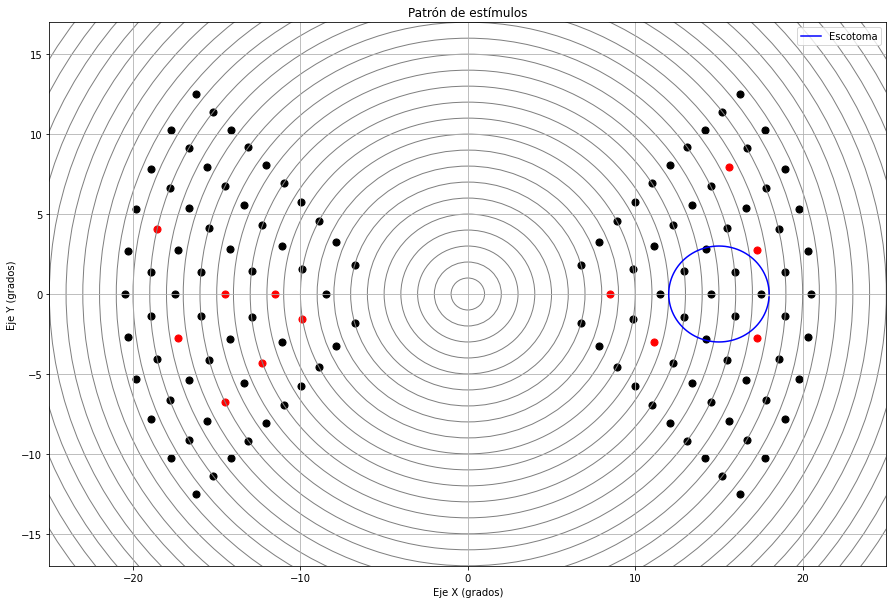

In [153]:
# Grafico el resultado

plt.figure(figsize=(15,10))
for i in range(len(Resultado)):
    if len(Resultado[i])==3:
        color = 'red'
    else:
        color = 'black'
    plt.scatter(np.array([coord[0] for coord in Resultado][i]), np.array([coord[1] for coord in Resultado][i]), s=50,edgecolors=color,facecolors=color)# Puntos grandes sin relleno
plt.plot(px, py,color='blue',label='Escotoma')# Puntos grandes sin relleno
# Configurar etiquetas y límites
plt.xlabel('Eje X (grados)')
plt.ylabel('Eje Y (grados)')
plt.xlim(-25,25)
plt.ylim(-17,17)
plt.grid(True,axis='both')
plt.legend()
# Añadir circunferencias de cuadrícula

for i in range(0, 30):
    circulo = Circle((0, 0), i,linestyle='-',facecolor='none',edgecolor='grey')        
    plt.gca().add_artist(circulo)
plt.title('Patrón de estímulos')

# Añadir cuadrícula con más líneas verticales y horizontales
plt.show()

In [154]:
Vector_nuevo = []
for i in range(len(Resultado)):
    x , y = [coord[0] for coord in Resultado][i], [coord[1] for coord in Resultado][i]
    if len(Resultado[i])==3:
        for j in range(len(Resultado)):
            diferencia = [abs([coord[0] for coord in Resultado][j]-x), abs([coord[1] for coord in Resultado][j]-y)]
            if (np.linalg.norm(diferencia))<3.5:
                Vector_nuevo.append([[coord[0] for coord in Resultado][j], [coord[1] for coord in Resultado][j]])

In [155]:
# Convertir la lista a un conjunto de tuplas para eliminar duplicados
vectores_unicos = list(set(tuple(vector) for vector in Vector_nuevo))

# Convertir de nuevo a una lista de listas si es necesario
vectores_unicos = [list(vector) for vector in vectores_unicos]

len(vectores_unicos)


82

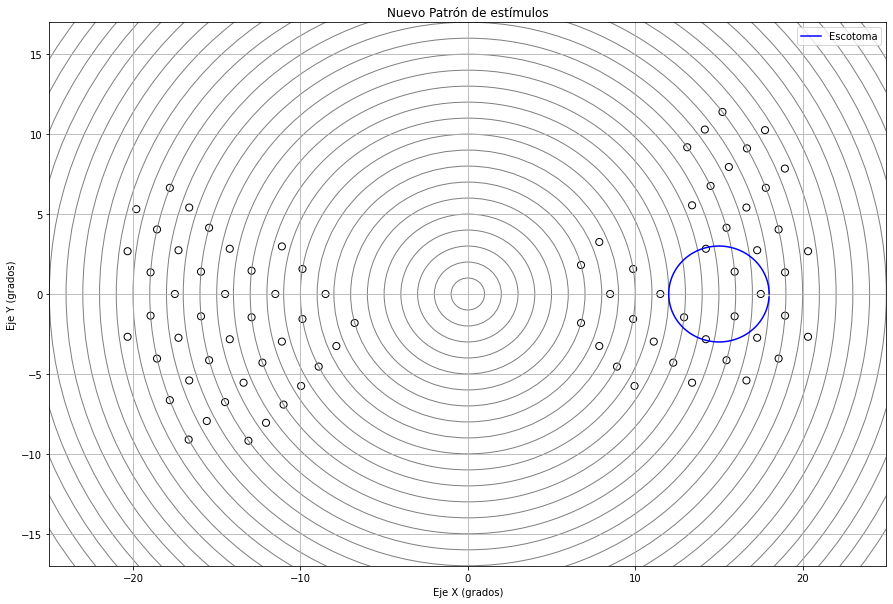

82

In [156]:
plt.figure(figsize=(15,10))
plt.scatter(np.array([coord[0] for coord in vectores_unicos]), np.array([coord[1] for coord in vectores_unicos]), s=50,edgecolors='black',facecolors='none')# Puntos grandes sin relleno
plt.plot(px, py,color='blue',label='Escotoma')# Puntos grandes sin relleno
# Configurar etiquetas y límites
plt.xlabel('Eje X (grados)')
plt.ylabel('Eje Y (grados)')
plt.xlim(-25,25)
plt.ylim(-17,17)
plt.grid(True,axis='both')
plt.legend()
# Añadir circunferencias de cuadrícula

for i in range(0, 30):
    circulo = Circle((0, 0), i,linestyle='-',facecolor='none',edgecolor='grey')        
    plt.gca().add_artist(circulo)
plt.title('Nuevo Patrón de estímulos')

# Añadir cuadrícula con más líneas verticales y horizontales
plt.show()
len([coord[0] for coord in vectores_unicos])

In [157]:
## Realizo la prueba de nuevo
# Simulo una prueba con resultados 1 y 0
Resultado_2 = []
for i in range(len([coord[0] for coord in vectores_unicos])):
    x,y = [coord[0] for coord in vectores_unicos][i],[coord[1] for coord in vectores_unicos][i]
    resultado = rd.randint(0,10)
    if resultado == 0:
        Resultado_2.append([x,y,resultado])
        indice = [i for i, vector in enumerate(Resultado) if vector[:2] == [x,y]][0]
        Resultado[indice].append(resultado)
        estimulo_no_detectado.append([x,y])
    else:
        Resultado_2.append([x,y])
len(Resultado_2)

82

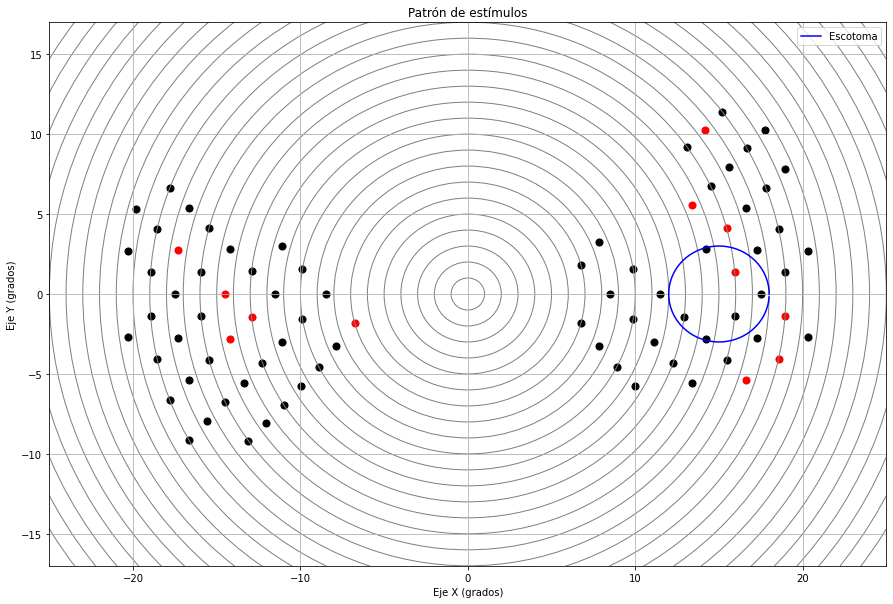

In [158]:
# Grafico el resultado

plt.figure(figsize=(15,10))
for i in range(len(Resultado_2)):
    if len(Resultado_2[i])==3:
        color = 'red'
    else:
        color = 'black'
    plt.scatter(np.array([coord[0] for coord in Resultado_2][i]), np.array([coord[1] for coord in Resultado_2][i]), s=50,edgecolors=color,facecolors=color)# Puntos grandes sin relleno
plt.plot(px, py,color='blue',label='Escotoma')# Puntos grandes sin relleno
# Configurar etiquetas y límites
plt.xlabel('Eje X (grados)')
plt.ylabel('Eje Y (grados)')
plt.xlim(-25,25)
plt.ylim(-17,17)
plt.grid(True,axis='both')
plt.legend()
# Añadir circunferencias de cuadrícula

for i in range(0, 30):
    circulo = Circle((0, 0), i,linestyle='-',facecolor='none',edgecolor='grey')        
    plt.gca().add_artist(circulo)
plt.title('Patrón de estímulos')

# Añadir cuadrícula con más líneas verticales y horizontales
plt.show()

In [159]:
Vector_nuevo_2 = []
for i in range(len(Resultado_2)):
    x , y = [coord[0] for coord in Resultado_2][i], [coord[1] for coord in Resultado_2][i]
    if len(Resultado_2[i])==3:
        for j in range(len(Resultado_2)):
            diferencia = [abs([coord[0] for coord in Resultado_2][j]-x), abs([coord[1] for coord in Resultado_2][j]-y)]
            if (np.linalg.norm(diferencia))<3.5:
                Vector_nuevo_2.append([[coord[0] for coord in Resultado_2][j], [coord[1] for coord in Resultado_2][j]])
# Convertir la lista a un conjunto de tuplas para eliminar duplicados
vectores_unicos_2 = list(set(tuple(vector) for vector in Vector_nuevo_2))

# Convertir de nuevo a una lista de listas si es necesario
vectores_unicos_2 = [list(vector) for vector in vectores_unicos_2]

len(vectores_unicos_2)


49

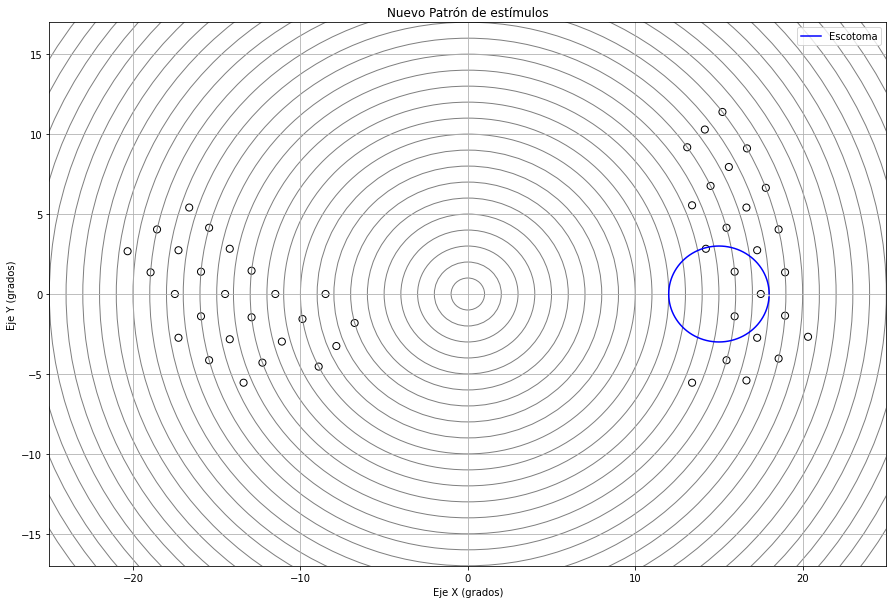

In [160]:
plt.figure(figsize=(15,10))
plt.scatter(np.array([coord[0] for coord in vectores_unicos_2]), np.array([coord[1] for coord in vectores_unicos_2]), s=50,edgecolors='black',facecolors='none')# Puntos grandes sin relleno
plt.plot(px, py,color='blue',label='Escotoma')# Puntos grandes sin relleno
# Configurar etiquetas y límites
plt.xlabel('Eje X (grados)')
plt.ylabel('Eje Y (grados)')
plt.xlim(-25,25)
plt.ylim(-17,17)
plt.grid(True,axis='both')
plt.legend()
# Añadir circunferencias de cuadrícula

for i in range(0, 30):
    circulo = Circle((0, 0), i,linestyle='-',facecolor='none',edgecolor='grey')        
    plt.gca().add_artist(circulo)
plt.title('Nuevo Patrón de estímulos')

# Añadir cuadrícula con más líneas verticales y horizontales
plt.show()


In [161]:
## Realizo la prueba de nuevo
# Simulo una prueba con resultados 1 y 0
Resultado_3 = []
for i in range(len([coord[0] for coord in vectores_unicos_2])):
    x,y = [coord[0] for coord in vectores_unicos_2][i],[coord[1] for coord in vectores_unicos_2][i]
    resultado = rd.randint(0,10)
    if resultado == 0:
        Resultado_3.append([x,y,resultado])
        indice = [i for i, vector in enumerate(Resultado_2) if vector[:2] == [x,y]][0]
        Resultado[indice].append(resultado)
        estimulo_no_detectado.append([x,y])
    else:
        Resultado_3.append([x,y])

len(Resultado_3)

49

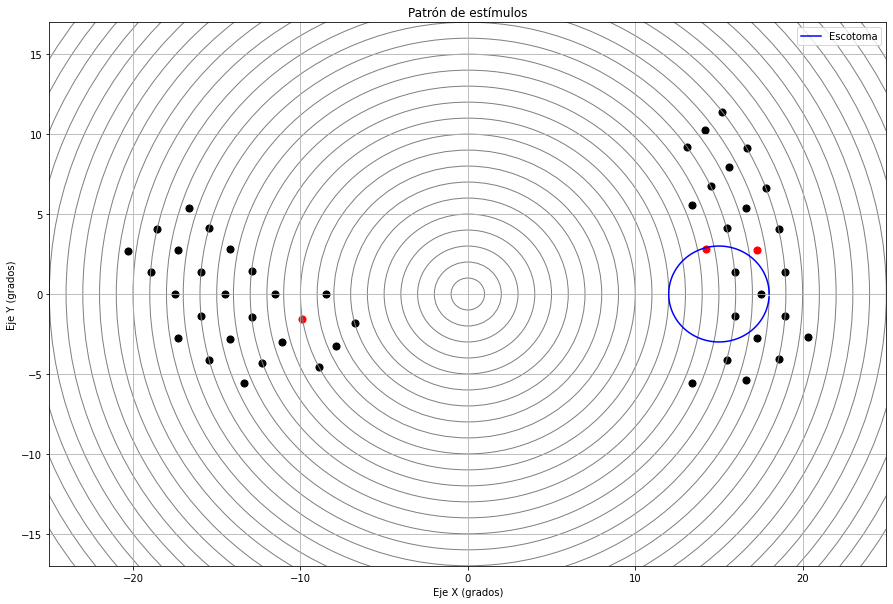

In [162]:
# Grafico el resultado

plt.figure(figsize=(15,10))
for i in range(len(Resultado_3)):
    if len(Resultado_3[i])==3:
        color = 'red'
    else:
        color = 'black'
    plt.scatter(np.array([coord[0] for coord in Resultado_3][i]), np.array([coord[1] for coord in Resultado_3][i]), s=50,edgecolors=color,facecolors=color)# Puntos grandes sin relleno
plt.plot(px, py,color='blue',label='Escotoma')# Puntos grandes sin relleno
# Configurar etiquetas y límites
plt.xlabel('Eje X (grados)')
plt.ylabel('Eje Y (grados)')
plt.xlim(-25,25)
plt.ylim(-17,17)
plt.grid(True,axis='both')
plt.legend()
# Añadir circunferencias de cuadrícula

for i in range(0, 30):
    circulo = Circle((0, 0), i,linestyle='-',facecolor='none',edgecolor='grey')        
    plt.gca().add_artist(circulo)
plt.title('Patrón de estímulos')

# Añadir cuadrícula con más líneas verticales y horizontales
plt.show()

In [151]:
Resultado_final = []
for i in range(len(Resultado)):
    x,y = [coord[0] for coord in Resultado][i], [coord[1] for coord in Resultado][i]
    frecuencia_errores = len(Resultado[i])-2
    Resultado_final.append([x,y,frecuencia_errores])
Resultado_final

[[6.761480784023478, -1.8117333157176456, 0],
 [-6.761480784023478, 1.8117333157176456, 0],
 [6.761480784023478, 1.8117333157176447, 0],
 [-6.761480784023478, -1.8117333157176447, 0],
 [7.852976026345937, -3.252809175103263, 1],
 [-7.852976026345937, 3.252809175103263, 0],
 [8.5, 0.0, 0],
 [-8.5, -0.0, 0],
 [7.852976026345937, 3.252809175103263, 0],
 [-7.852976026345937, -3.252809175103263, 0],
 [8.910065241883679, -4.5399049973954675, 0],
 [-8.910065241883679, 4.5399049973954675, 0],
 [9.876883405951379, -1.5643446504023086, 0],
 [-9.876883405951379, 1.5643446504023086, 0],
 [9.876883405951379, 1.5643446504023086, 0],
 [-9.876883405951379, -1.5643446504023086, 0],
 [8.910065241883679, 4.5399049973954675, 0],
 [-8.910065241883679, -4.5399049973954675, 0],
 [9.959292143521044, -5.75, 0],
 [-9.959292143521044, 5.75, 1],
 [11.108147002324285, -2.976419018678989, 0],
 [-11.108147002324285, 2.976419018678989, 0],
 [11.5, 0.0, 0],
 [-11.5, -0.0, 1],
 [11.108147002324285, 2.976419018678988, 1

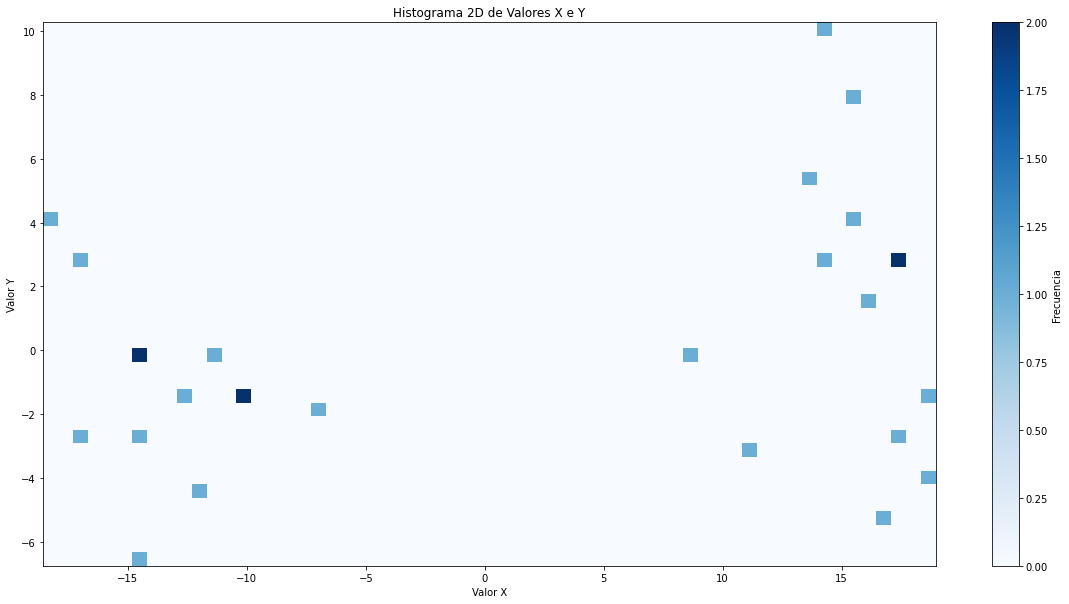

In [163]:
# Crear el histograma 2D
plt.figure(figsize=(20,10))
plt.hist2d([coord[0] for coord in estimulo_no_detectado], [coord[1] for coord in estimulo_no_detectado], bins=[60, 40], cmap='Blues')
plt.colorbar(label='Frecuencia')
plt.title('Histograma 2D de Valores X e Y');plt.xlabel('Valor X');plt.ylabel('Valor Y')
plt.show()